<a href="https://colab.research.google.com/github/AnthonyM99/Seminario-Profesional/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
max_features = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

class_names = ['(Bad)','(Good)']
num_classes = 2

max_len = 8000
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

In [63]:
model = Sequential([
    Flatten(input_shape=(max_len, )),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              8193024   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 8,849,409
Trainable params: 8,849,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(train_data, 
          train_labels, 
          validation_split=0.3,
          batch_size=128,
          epochs=5
          )   

Train on 17500 samples, validate on 7500 samples
Epoch 1/5
17500/17500 [==============================] - 19s 1ms/sample - loss: 27.1995 - accuracy: 0.4982 - val_loss: 1.9072 - val_accuracy: 0.5039
Epoch 2/5
17500/17500 [==============================] - 18s 1ms/sample - loss: 1.1219 - accuracy: 0.6170 - val_loss: 1.4254 - val_accuracy: 0.5155
Epoch 3/5
17500/17500 [==============================] - 18s 1ms/sample - loss: 0.5423 - accuracy: 0.7575 - val_loss: 1.4233 - val_accuracy: 0.5091
Epoch 4/5
17500/17500 [==============================] - 18s 1ms/sample - loss: 0.2893 - accuracy: 0.8790 - val_loss: 1.5512 - val_accuracy: 0.5063
Epoch 5/5
17500/17500 [==============================] - 18s 1ms/sample - loss: 0.1588 - accuracy: 0.9506 - val_loss: 1.6966 - val_accuracy: 0.5019


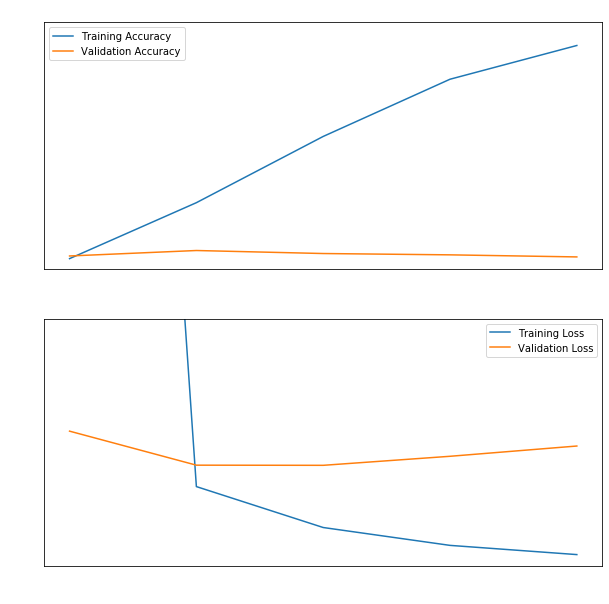

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,3.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [67]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
input_text = "Wow how disappointing dont buy this until they get this improved, older version of this is better in my opinion. The newer version gave me 8+ crashes of system and game crashes leading up to finally unable to play this system having to return this system ,what a horrible experience this was. Being a big Nintendo switch player what a great disappointment this was. Hopefully they improve this newer version system to where this does not happen again or to someone else."

input_text = (input_text.translate(str.maketrans('', '', string.punctuation))).lower()
encoded = np.array(list(map(lambda w: index.get(w,max_features), input_text.split(' '))))
encoded = encoded[encoded < max_features]
decoded = " ".join([reverse_index.get(i, "") for i in encoded])

encoded = pad_sequences([encoded], maxlen=max_len).flatten()
prediction = model.predict(tf.expand_dims(encoded, axis=0))

print(decoded)
print('Predicted class is:', np.array(class_names)[np.rint(prediction).astype('int32')])

wow how disappointing dont buy this until they get this improved older version of this is better in my opinion the newer version gave me 8 crashes of system and game crashes leading up to finally unable to play this system having to return this system what a horrible experience this was being a big switch player what a great disappointment this was hopefully they improve this newer version system to where this does not happen again or to someone else
Predicted class is: [['(Bad)']]
